<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [4]:
data = pd.read_csv('a:\Python\Skillfactory Pandas\Final project for hh.ru\hh_database.csv', sep=';')
hh_data = data.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [5]:
hh_data.head()
hh_data.tail()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [6]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [7]:
hh_data.notnull().count()

Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44744
Последнее/нынешнее место работы    44744
Последняя/нынешняя должность       44744
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [8]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [9]:
'''
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(lambda x: x.split(' ')[:2])
hh_data['Образование'] = hh_data['Образование'].apply(lambda x: (str(x[0]) + ' '+str(x[1])) if str(x[1]) == 'высшее' or str(x[1]) == 'специальное' else str(x[0])) 
hh_data['Образование'].unique()
print(hh_data['Образование'] == 'Среднее')sum())
'''
def get_education(arg):
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)
numbers_mean_people = ((hh_data['Образование'] == 'среднее').sum())
print(f'Число соискателей, имеющие средний уровень образования: {numbers_mean_people}')

Число соискателей, имеющие средний уровень образования: 559


### Удаление столбца "Образование и ВУЗ"

In [10]:
hh_data.drop('Образование и ВУЗ', axis= 1, inplace = True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: x.split(',')[0])
hh_data['Пол'] = hh_data['Пол'].str.strip().map({'Мужчина':'М','Женщина':'Ж'})
gender_counts = hh_data['Пол'].value_counts()
mean_woman = (gender_counts['Ж'] / gender_counts.sum()) * 100
percent_woman = round(mean_woman,2)
print(f'Процент женских резюие в данных: {percent_woman}')

Процент женских резюие в данных: 19.07


In [12]:
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: x.split(',')[1])
hh_data['Возраст'] = hh_data['Возраст'].str.strip().apply(lambda x: x.split(' ')[0])
#average_age = (hh_data['Возраст']).mean(skipna= True)
#round(average_age,1)
#Привожу к типу int строку, потому что без неё выдаёт inf
hh_data['Возраст'] = hh_data['Возраст'].astype(int)
average_age = round(hh_data['Возраст'].mean(),1)

print(f'Средний возраст соискателей: {average_age}')


Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [13]:

def work_count(exp):
    if exp is np.nan or exp == 'Не указано':
        return None
    exp = str(exp).split(' ')[:7]
    years_list = ['год','года','лет']
    month_list = ['месяц','месяцев','месяца']
    month = 0
    month_year = 0
    for i, elem in enumerate(exp):
        if elem in years_list:
            month_year = int(exp[i-1])
        if elem in month_list:
            month = int(exp[i-1])
    return int(month_year * 12 + month)
                
hh_data['Опыт работы'] = hh_data['Опыт работы'].apply(work_count)


In [14]:
hh_data['Опыт работы'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [15]:
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(lambda x: x.split(',')[0])
hh_data['Город'] = hh_data['Город'].apply(lambda x: x.strip())
def city_sort(city):
    million_city = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск',
                    'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    if str(city) == 'Москва' or str(city) == 'Санкт-Петербург':
        return str(city)
    if str(city) in million_city:
        return 'город-миллионник'
    else:
        return 'другие'

hh_data['Город'] = hh_data['Город'].apply(city_sort)

sanct_counts = hh_data['Город'].value_counts()
sanct_percent = round((sanct_counts['Санкт-Петербург'] / sanct_counts.sum()) * 100, 0)
print(f'Процент соискателей которые живут в Санкт-Петербурге равен: {sanct_percent}')

#sanct = round(((hh_data['Город'] == 'Санкт-Петербург').value_counts(normalize=True) * 100),2)


 

Процент соискателей которые живут в Санкт-Петербурге равен: 11.0


In [18]:
def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
    
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_ready_to_move)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
people_percent_true = round(hh_data[['Готовность к переезду', 'Готовность к командировкам']].value_counts(normalize=True)[True, True] * 100)
print(f'Процент людей готовых к переезду и командировкам = {people_percent_true} %')

Процент людей готовых к переезду и командировкам = 32 %


#### Удаление стобца


In [19]:
hh_data.drop('Город, переезд, командировки', axis = 1, inplace = True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [21]:
hh = hh_data.copy()
charts = ['полный день','удаленная работа','вахтовый метод', 'гибкий график', 'сменный график']
employments = ['проектная работа', 'волонтерство', 'стажировка', 'полная занятость', 'частичная занятость']

for employment, chart in zip(employments, charts):
    hh[employment] = hh['Занятость'].apply(lambda x: employment in x)
    hh[chart] = hh['График'].apply(lambda x: chart in x)

count_people = hh[(hh['проектная работа'] == True) & (hh['волонтерство'] == True)].shape[0]
print(f'Количество людей, которые ищут и проектную работу, и волонёство: {count_people}')
count_people_2 = hh[(hh['гибкий график'] == True) & (hh['вахтовый метод']) == True].shape[0]
print(f'Количество людей, которые хотят работаться вахтовым методом, либо гибкий график: {count_people_2}')
    

Количество людей, которые ищут и проектную работу, и волонёство: 436
Количество людей, которые хотят работаться вахтовым методом, либо гибкий график: 2311


### Удаление столбцов "Занятость" и "График"

In [22]:
hh.drop(['Занятость','График'], axis = 1, inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [23]:
hh_data = hh.copy()

In [24]:
coin = pd.read_csv('a:\Python\Skillfactory Pandas\Final project for hh.ru\ExchangeRates.csv', sep=',')
def replace_currency(value):
    currency_dict = {
        'USD':'USD', 'грн.': 'UAH',
        'EUR':'EUR', 'бел.руб.': 'BYN',
        'KGS': 'KGS', 'сум': 'UZS',
        'AZN': 'AZN', 'KZT': 'KZT'
    }
    value = value.split(' ')[1]
    if value == 'руб.':
        return 'RUB'
    else:
        return currency_dict[value]

coin['date'] = pd.to_datetime(coin['date']).dt.date   
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date   
hh_data['ЗПб'] = hh_data['ЗП'].apply(lambda x: float(x.split(' ')[0]))
hh_data['Курс валют'] = hh_data['ЗП'].apply(replace_currency)

merged = hh_data.merge(
    coin,
    left_on = ['Курс валют', 'Обновление резюме'],
    right_on = ['currency', 'date'],
    how='left'
)

merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
hh_data['ЗП руб'] = merged['close'] * merged['ЗПб'] / merged['proportion']

merged.loc[merged['close'] == 'UZS', 'proportion'] = 0.0001

median_zp = ((hh_data['ЗП руб'].median()/1000))
print(f'Медианная зарплата равна: {median_zp}')


C:\Users\DasaD\AppData\Local\Temp\ipykernel_5720\305481127.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coin['date'] = pd.to_datetime(coin['date']).dt.date
C:\Users\DasaD\AppData\Local\Temp\ipykernel_5720\305481127.py:16: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date


Медианная зарплата равна: 59.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Text(0, 0.5, 'Возраст')

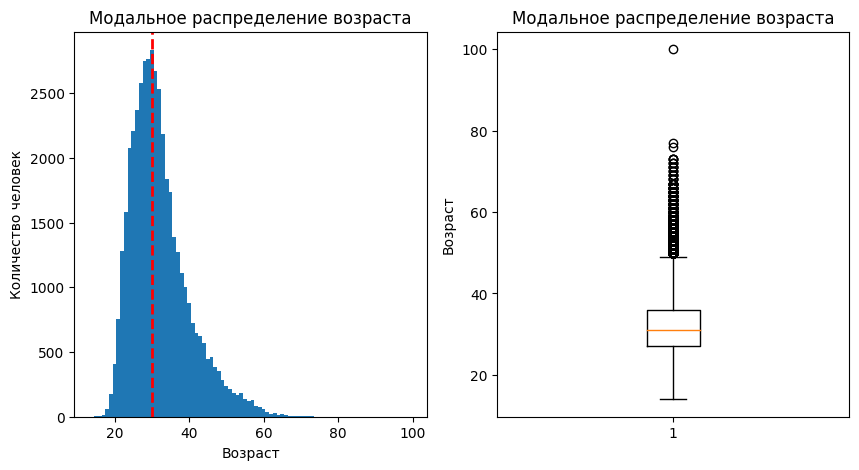

In [25]:
ages = hh_data['Возраст']
mode = np.argmax(np.bincount(ages))
'''
plt.hist(ages, bins=range(min(ages), max(ages)+1), align='left')
plt.axvline(mode, color='r', linestyle='dashed', linewidth=2)
plt.title('Модальное распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество человек')
plt.show()
sns.boxplot(data=ages)
plt.title('Модальное распределение возраста')
plt.ylabel('Возраст')

#hh_data['Возраст'].mode()
'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(ages, bins=range(min(ages), max(ages)+1), align='left')
ax1.axvline(mode, color='r', linestyle='dashed', linewidth=2)
ax1.set_title('Модальное распределение возраста')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество человек')

ax2.boxplot(ages)
ax2.set_title('Модальное распределение возраста')
ax2.set_ylabel('Возраст')


-----
### Выводы по графикам:
   * Мода распределения равна 30
   * Большая часть значений распределена в интервале от 20 до 40.
   * В интеревале от 40 до 75 прослеживается чёткий спад распределения.
   * На коробчатой диаграмме ясно видно, что имеется много выбросов. Возможно, говорит о том, что люди могли ошибиться при заполнении данных, т.к. маловероятно, что 
   в возрасте за 65(70) лет кто-то будет искать работу.
   * Так же есть отдельный выброс с показателем 100 лет, что точно говорит об аномалии.

   -----

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

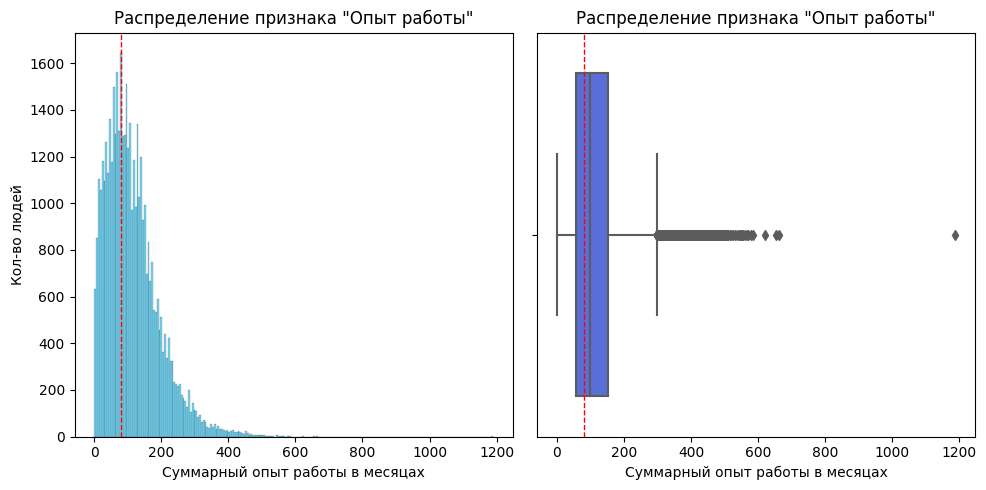

Мода распределдения равна: 81.0
Максимальное значение распределения равен: 1188


In [26]:
mode_2 = hh_data['Опыт работы'].mode().values[0]
expirience = hh_data['Опыт работы']
min_value = int(min(hh_data['Опыт работы']))
max_value = int(max(hh_data['Опыт работы']))

fig, axs = plt.subplots(1,2,figsize=(10,5))

sns.histplot(data = hh_data, x= 'Опыт работы', color='#4CC9F0', ax = axs[0])
sns.boxplot(data = hh_data, x='Опыт работы', color='#4361EE', ax =axs[1])

axs[0].set_xlabel('Суммарный опыт работы в месяцах')
axs[0].set_ylabel('Кол-во людей')
axs[0].set_title('Распределение признака "Опыт работы"')
axs[0].axvline(mode_2, color='r', linestyle= 'dashed', linewidth=1)

axs[1].set_title('Распределение признака "Опыт работы"')
axs[1].set_xlabel('Суммарный опыт работы в месяцах')
axs[1].axvline(mode_2, color='r', linestyle= 'dashed', linewidth=1)

plt.tight_layout()
plt.show()

print(f'Мода распределдения равна: {mode_2}')
print(f'Максимальное значение распределения равен: {max_value}')


------
### Выводы по графикам
* Мода распределения равна 81.
* Большая часть данных распределена в интервале от 0 до 200 месяцев.
* Резкое снижение показателей в интервале с 200 до 400.
* На коробчатой диаграмме видно, что выбросы начинаются примерно с отметки 300 и выше.
* Чётко выделяется аномальное значение, т.к. вряд ли кто-то сможет иметь опыт работы в 99 лет.

-----

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


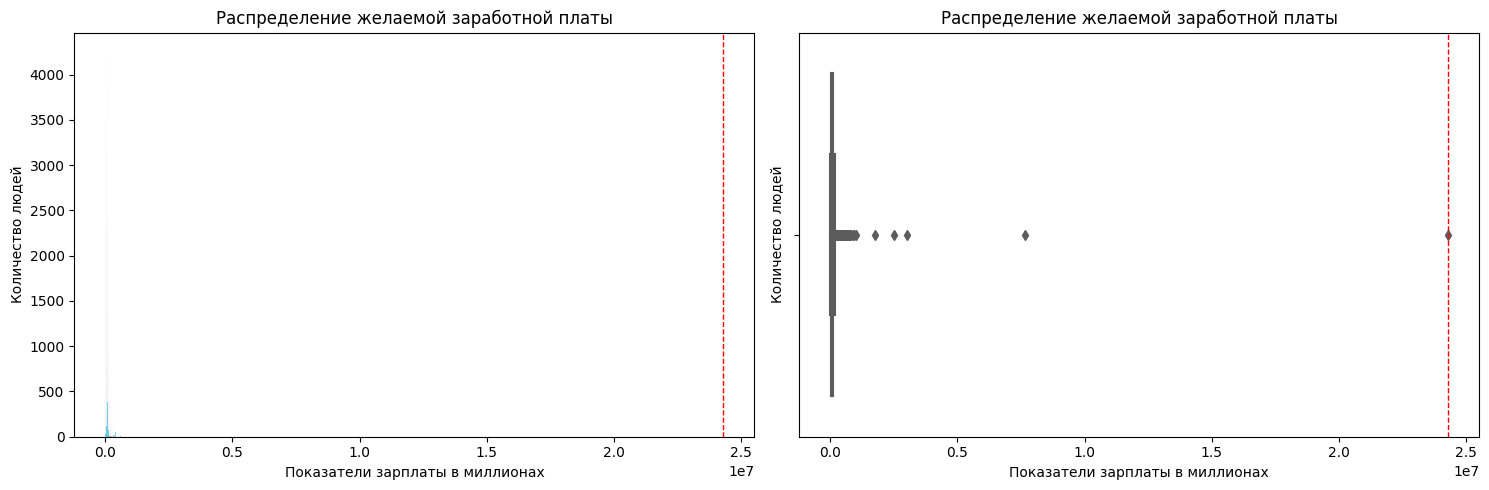

Максиманый показатель желаемой зарплаты: 24304876.0
Кол-во людей указавших зарплату выше миллиона: 5
Мода желаемой зарплаты: 50000.0


In [27]:
max_value_2 = hh_data['ЗП руб'].max()

fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data = hh_data, x= 'ЗП руб', color='#4CC9F0', ax = axs[0])
sns.boxplot(data = hh_data, x='ЗП руб', color='#4361EE', ax =axs[1])

axs[0].set_title('Распределение желаемой заработной платы')
axs[0].set_xlabel('Показатели зарплаты в миллионах')
axs[0].set_ylabel('Количество людей')
axs[0].axvline(max_value_2, color='r', linestyle= 'dashed', linewidth=1)

axs[1].set_title('Распределение желаемой заработной платы')
axs[1].set_xlabel('Показатели зарплаты в миллионах')
axs[1].set_ylabel('Количество людей')
axs[1].axvline(max_value_2, color='r', linestyle= 'dashed', linewidth=1)

plt.tight_layout()
plt.show()

print(f'Максиманый показатель желаемой зарплаты: {max_value_2}')

count_million = (hh_data['ЗП руб'] > 1000000).sum()
print(f'Кол-во людей указавших зарплату выше миллиона: {count_million}')

mode_3 = hh_data['ЗП руб'].mode().values[0]
print(f'Мода желаемой зарплаты: {mode_3}')


-----
### Выводы по графикам
* Из-за большого разброса графики стали "неинформативными".
* Примерно, можно сделать вывод, что желаемая зарплата находится в интервале от 15000 - 500.000 рублей.
* На коробчатой диаграмме чётко прослеживается большое кол-во выбросов и на большом интервале.

-----


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

Text(0.5, 1.0, 'Зависимость медианного значения от уровня образования')

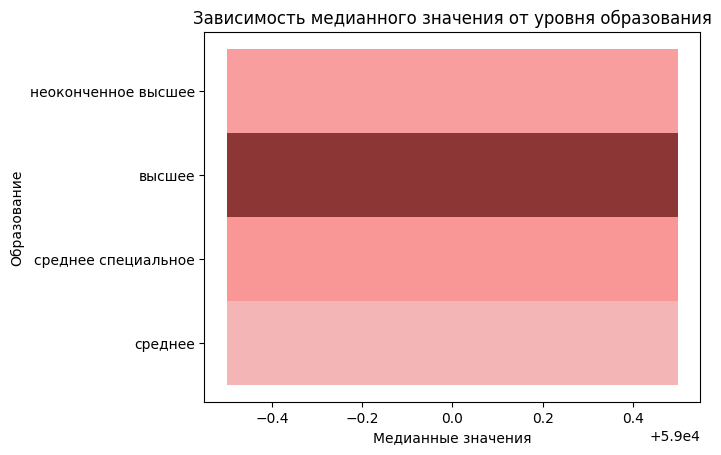

In [28]:
median_values = hh_data['ЗП руб'].median()

sns.histplot(data= hh_data[hh_data['ЗП руб'] < 1000000], x=median_values, y ='Образование', color='Red')
plt.xlabel('Медианные значения')
plt.title('Зависимость медианного значения от уровня образования')


------
### Выводы по графику
* Наибольший уровень желаемой зарплаты у тех, кто имеет высшее образование.
* Наименьший уровень желаемой зарплаты у тех, кто имеет только среднее образование.
* Примерно на одном уровне, между максимальным значением и минимальным те, у кого уровень образования "неоконченное высшее" и "среднее специальное".
* Определённо, что уровень желаемой заработной платы выше у тех, у кого есть высшее образование. 

-----

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

Text(0, 0.5, 'Города и категории')

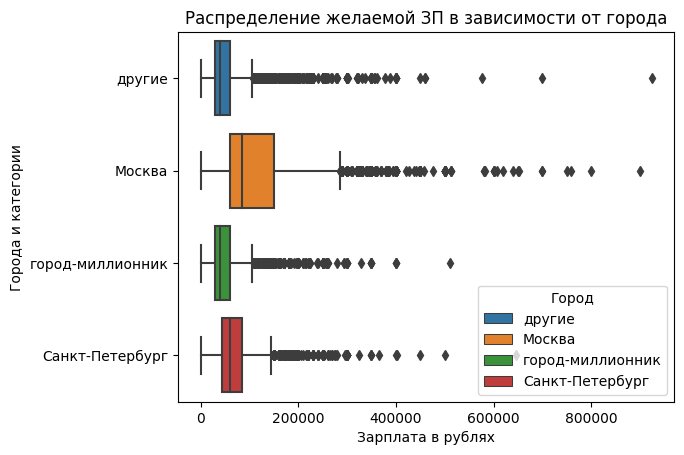

In [29]:
filter_data_2= hh_data[hh_data['ЗП руб'] < 1000000]
'''
median_salary_by_city = filter_data_2.groupby('Город')['ЗП руб'].median().sort_values()

plt.figure(figsize=(12, 6))
plt.bar(median_salary_by_city.index, median_salary_by_city.values)
plt.xticks(rotation=45)
plt.xlabel('Город')
plt.ylabel('Медианная зарплата')
plt.title('Зависимость медианной зарплаты от городов')

plt.show()
'''
sns.boxplot(data= filter_data_2, x='ЗП руб', y='Город', hue='Город', dodge=False)
plt.title('Распределение желаемой ЗП в зависимости от города')
plt.xlabel('Зарплата в рублях')
plt.ylabel('Города и категории')


------
### Выводы по графикам
* Медианное значение выше всего в Москве.
* Самый большой "размах" значений в Москве.
* В категории "другие" самое большое количество выбросов.
* Можно сделать вывод, что 50% значений в Москве имеют больший разброс и в целом желаемая зарплата значительно выше, чем в других катеориях.

------

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

,Готовность к переезду,Готовность к командировкам,ЗП руб
0,False,False,40000.00
1,False,True,60000.00
2,True,False,50000.00
3,True,True,65924.25


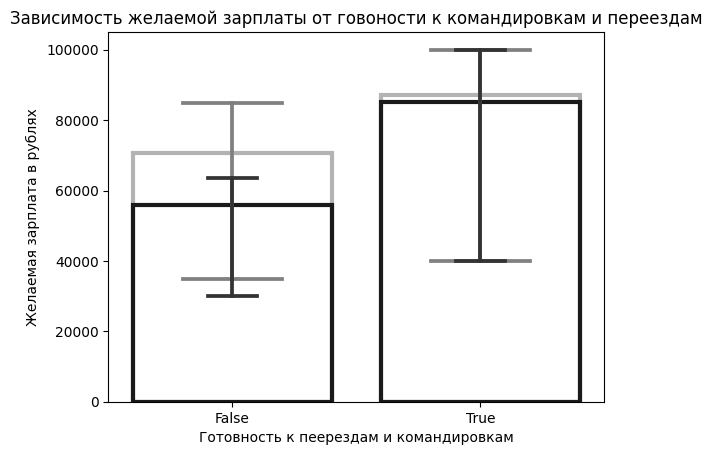

In [30]:

sns.barplot(data = hh_data, x = 'Готовность к переезду', y='ЗП руб', errorbar=("pi", 50), capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".7", facecolor=(0, 0, 0, 0))
sns.barplot(data = hh_data, x = 'Готовность к командировкам', y = 'ЗП руб', errorbar=("pi", 50), capsize=.2, errcolor=".2",
    linewidth=3, edgecolor=".1", facecolor=(0, 0, 0, 0))
'''
#Второй вариант диаграммы, если первый всё таки не удачный.
sns.barplot(data = hh_data, x='Готовность к переезду', y='ЗП руб', palette='Set1')
sns.barplot(data = hh_data, x='Готовность к командировкам', y = 'ЗП руб', palette='Set2', saturation=1.2)
'''
plt.title('Зависимость желаемой зарплаты от говоности к командировкам и переездам')
plt.ylabel('Желаемая зарплата в рублях')
plt.xlabel('Готовность к пеерездам и командировкам')

mask_loyal = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index= False)['ЗП руб'].median()
mask_loyal



--------
### Выводы по графику
* Те, кто готовы к переездам и командировкам, указывают зарплату выше тех, кто к этому не готов, примерно на 150'000 - 300'000 рублей.
* Можно отметить, что среди тех, кто готов к переездам и командировкам, указанные зарплаты почти одинаковы,
* тогда как среди тех, кто НЕ готов переезжать указанная зарплата отличается существенно.

--------

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

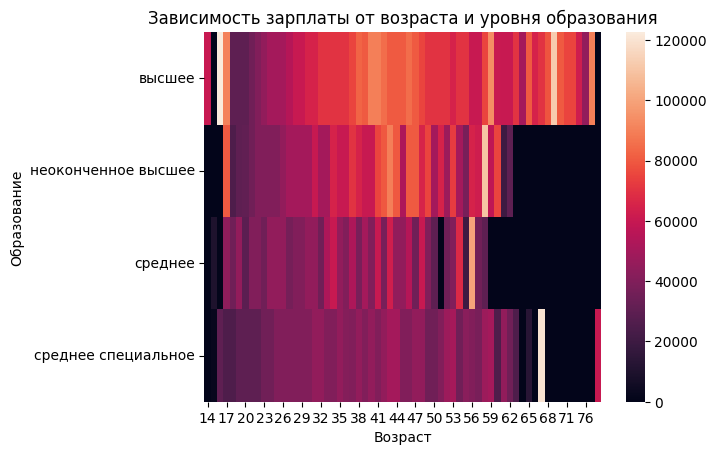

In [31]:
pivot_data = hh_data.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП руб',
    aggfunc='median',
    fill_value=0
)
sns.heatmap(pivot_data)
plt.title('Зависимость зарплаты от возраста и уровня образования')
plt.show()

--------
### Выводы по графику
* Можно сразу отметить, что люди с высшим образованием планомерно поднимают планку желаемой зарплаты. Её пиковыое значение приходится на возраст с 38-50 лет и с 68-72 лет.
* Люди с неоконченным высшим довольно хаотично указывают желаемую зарплату, но можно сказать, что уровень в 58-59 лет выделяется по значению.
* Люди со среднем образованиему указывают зарплату заметно ниже людей с высшим и неок. высшим образованием, но можно отметить пиковое значение на отметке 56 лет.
* Люди со среднем специальным образованием преимущественно отмечают низкую желаемую плату. Так же можно заметить резкое выделение на общем фоне значения на уровне 67 лет,
что, возможно, указывает на выброс.
* Так же видно выброс на отметке 78 лет в категории "среднее специальное".
* Стоит отметить несколько значений в категории "высшее" в интервале 14-17 лет, а именно их достоверность или корректность заполнения анкеты (возможно люди оишблись в дате рождения или указания возраста). В этом же интервале есть показатели в других категориях.

-------

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

Количество точек лежащих выше линии равно: (7, 28)


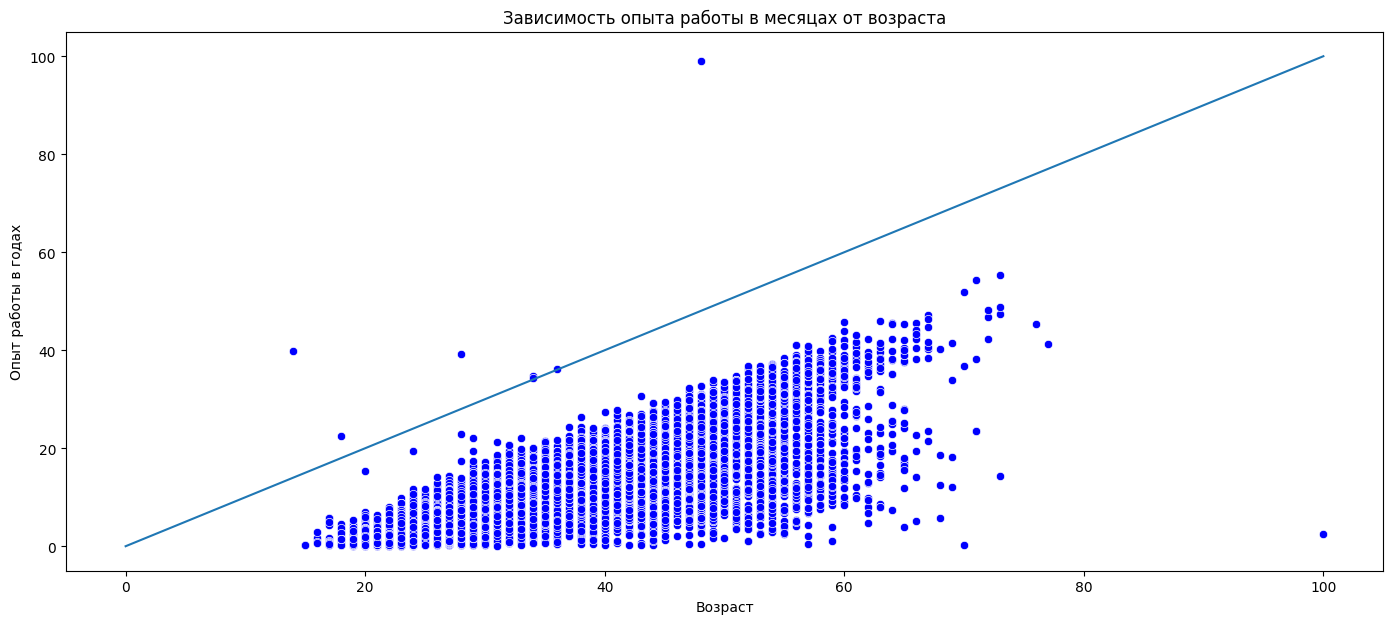

In [32]:
hh_data['Опыт работы (год)'] = hh_data['Опыт работы'] / 12
fig = plt.figure(figsize=(17, 7))
sns.lineplot(x = [0,100], y = [0,100])
ax = sns.scatterplot(data= hh_data, x = 'Возраст', y = 'Опыт работы (год)', color = 'blue')
ax.set_title('Зависимость опыта работы в месяцах от возраста')
ax.set_ylabel('Опыт работы в годах')

count_point = hh_data[hh_data['Опыт работы (год)'] >= hh_data['Возраст']].shape
print(f'Количество точек лежащих выше линии равно: {count_point}')

------
### Выводы по графику
* Распределение значений преимущественно равномерное.
* Наблюдается небольшое количество выбросов.
* Большая часть значений сосредоточена в интервале от 20 до 60.

-------

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


Text(0.5, 0.98, 'Зависимость кол-ва ищущих работу мужчин и женщин от категории городов')

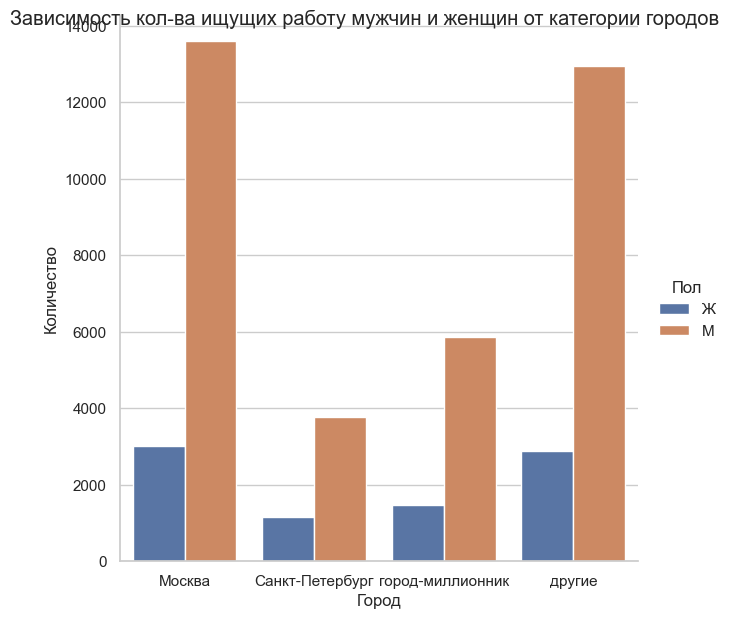

In [33]:
grouped_data = hh_data.groupby(['Город', 'Пол']).size().reset_index(name='Количество')
sns.set(style="whitegrid")
ax = sns.catplot(x='Город', y='Количество', hue='Пол', data=grouped_data, kind='bar', height= 6.3)
ax.fig.suptitle('Зависимость кол-ва ищущих работу мужчин и женщин от категории городов')



------
### Выводы по графику
* Чётко определяется колоссальная разница в Москве и категории городов "другие", между мужчинами ищущих работу и женщинами. Значительно меньше в Санкт-Петербурге и городах миллионниках.
* Подобное распределение может говорить о многом:
    1. Возможно это связано с тем, что женщины чаще и дольше работают на одном и том же месте и не так часто его меняют, в отличии от мужчин.
    2. Возможно это связано с тем, что женщины занимаются воспитанием детей или чем-то, что связанно с пребыванием дома и отсутствием возможности или необходимости искать работу.
    3. Возможно это связано с тем, что соотношение кол-ва доступной работы для мужчин выше, чем для женщин.
    4. Возможно это связано с неравными условиями оплаты труда.

-------

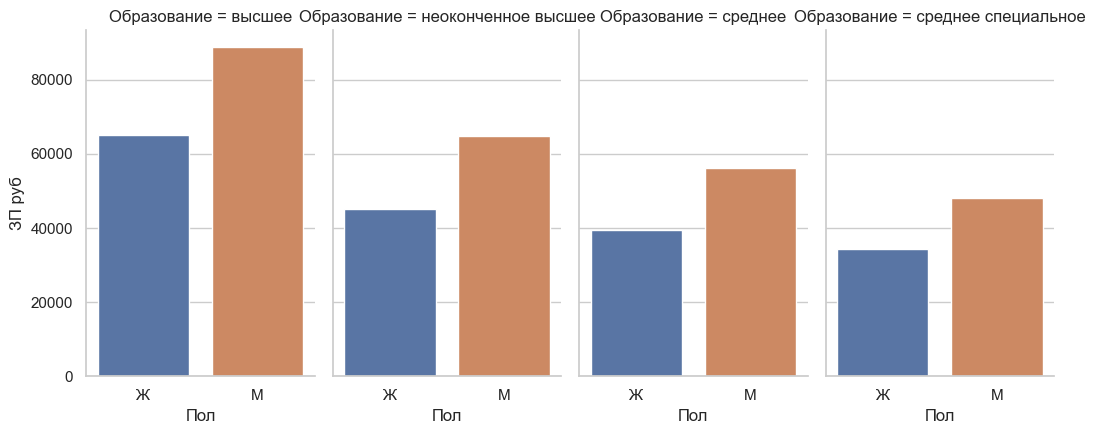

In [34]:
grouped_data_6 = hh_data.groupby(['Образование', 'Пол'])['ЗП руб'].mean().reset_index()

sns.catplot(
    data=grouped_data_6, x="Пол", y="ЗП руб", col="Образование",
    kind="bar", height=4.5, aspect=.6,
)

-------
### Выводы по графику
* Можно сделать вывод, что уровень желаемой зарплаты не зависит от уровня образования.
* Исходя их графиков, мужчины с любым образованием требуют зарплату больше чем у женщин, примерно на 25-30%. 

-------

## Удаление лишних столбцов

In [35]:
hh_data.drop(['Опыт работы (год)','ЗПб','Курс валют'], axis = 1, inplace=True)

In [36]:
hh_data.drop(['ЗП','Пол, возраст'], axis = 1, inplace = True)

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [37]:
df_hh = hh_data.copy()
df_hh['Опыт работы'].isnull().sum()

In [39]:
duplicates = df_hh[df_hh.duplicated(subset=df_hh.columns)]
df_hh = df_hh.drop_duplicates()
over_dupl = duplicates.shape[0]
print(f'Количество полных дубликатов: {over_dupl}')

Количество полных дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [40]:
null_df = df_hh.isnull().sum()
display(null_df[null_df > 0])

Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [41]:
df_hh = df_hh.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
df_hh['Опыт работы'] = df_hh['Опыт работы'].fillna(df_hh['Опыт работы'].median())
result_mean = round(df_hh['Опыт работы'].mean(),0)
print(f'Среднее результирующее занчение в столбце "Опыт работы": {result_mean}')

Среднее результирующее занчение в столбце "Опыт работы": 114.0


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [42]:
outliers = df_hh[(df_hh['ЗП руб'] > 1e6) | (df_hh['ЗП руб'] < 1e3)]
df_hh = df_hh.drop(outliers.index)
print(f'Кол-во выбросов равно: {outliers.shape[0]}')

Кол-во выбросов равно: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [43]:
outliers = df_hh[df_hh['Опыт работы'] / 12 >= df_hh['Возраст']]
df_hh = df_hh.drop(outliers.index)
print(f'Кол-во выбросов равно: {outliers.shape[0]}')

Кол-во выбросов равно: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

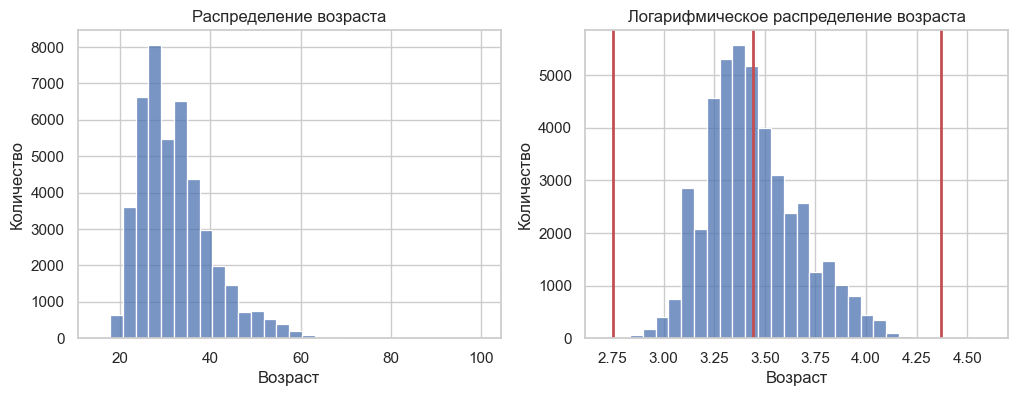

In [44]:
log_age = np.log(df_hh['Возраст'])
fig, axes = plt.subplots(1,2,figsize=(12,4))
histplot = sns.histplot(df_hh['Возраст'], bins=30, ax = axes[0])
axes[0].set_title('Распределение возраста')
axes[0].set_ylabel('Количество')
histplot = sns.histplot(log_age, bins=30, ax=axes[1])
axes[1].set_title('Логарифмическое распределение возраста')
axes[1].set_ylabel('Количество')
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='r', lw = 2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='r', lw = 2)
histplot.axvline(log_age.mean(), color='r', lw = 2)

--------
### Выводы по графикам
* Наблюдается положительная ассиметрия
--------

In [46]:
def outliers_z_score(data,feature, log_scale = False):
    if log_scale:
        x = np.log(data[feature])
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(df_hh, 'Возраст', log_scale=True)

print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число значений: {cleaned.shape[0]}')
display(outliers)

Число выбросов по методу z-отклонения: 3
Результирующее число значений: 44482


,Ищет работу на должность:,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Город,...,полный день,волонтерство,удаленная работа,стажировка,вахтовый метод,полная занятость,гибкий график,частичная занятость,сменный график,ЗП руб
31137,Менеджер по работе с клиентами,2.0,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,Санкт-Петербург,...,False,False,True,False,False,False,True,True,True,10000.0
32950,Тестировщик игр,3.0,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,другие,...,True,False,False,False,False,True,False,False,False,2000.0
33654,Frontend-разработчик,30.0,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,Санкт-Петербург,...,True,False,True,True,False,True,True,True,False,60000.0


------
### Выводы по таблице
* Возраст соискателей которые попали в выбросы равен 15 и 100 годам.
------